In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Drop or fill missing values
advertising_sales_data = df.dropna()

# 2. Feature Scaling
scaler = StandardScaler()
X = df[['TV', 'Radio', 'Newspaper']]  # Features
y = df['Sales']  # Target variable
X_scaled = scaler.fit_transform(X)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Now X_train, y_train, X_test, y_test are ready for model training and evaluation


  Campaign     TV  Radio  Newspaper  Sales
0    camp1  230.1   37.8       69.2   22.1
1    camp2   44.5   39.3       45.1   10.4
2    camp3   17.2   45.9       69.3   12.0
3    camp4  151.5   41.3       58.5   16.5
4    camp5  180.8   10.8       58.4   17.9
Campaign     0
TV           0
Radio        2
Newspaper    0
Sales        0
dtype: int64


In [37]:
# Extract the TV advertising expenditures
tv_expenditures = df['TV']

# Print the entire list of TV advertising expenditures
print("TV Advertising Expenditures:")
print(tv_expenditures)

# Calculate the average TV advertising expenditure
average_tv_expenditure = tv_expenditures.mean()
print(f"Average TV advertising expenditure: ${average_tv_expenditure:.2f}")


TV Advertising Expenditures:
0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64
Average TV advertising expenditure: $147.04


Correlation between Radio advertising and Sales: 0.35


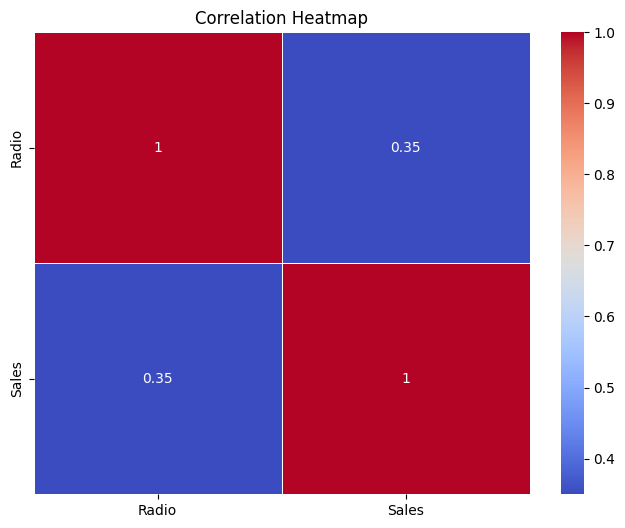

In [28]:

# Calculate correlations, excluding non-numerical columns
correlation_radio_sales = df['Radio'].corr(df['Sales'])
print(f"Correlation between Radio advertising and Sales: {correlation_radio_sales:.2f}")
correlation_matrix = df[['Radio', 'Sales']].corr()


# Create a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Coefficients (TV, Radio, Newspaper): [ 5.44940753e-02  1.07180244e-01 -1.90190181e-05]


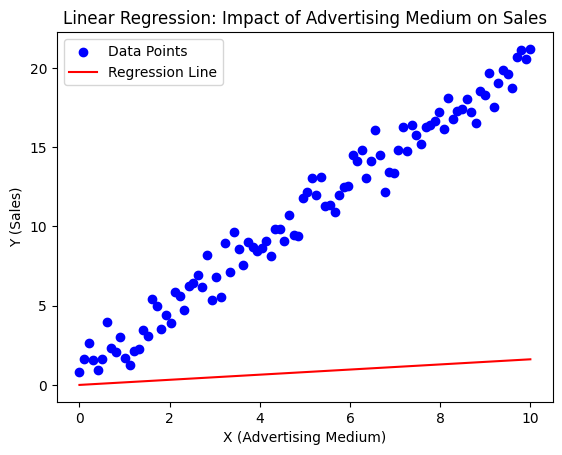

In [32]:
from sklearn.linear_model import LinearRegression

X = advertising_sales_data[['TV', 'Radio', 'Newspaper']]  # Use the cleaned data
y = advertising_sales_data['Sales']  # Use the cleaned data

# Fit the model
model = LinearRegression().fit(X, y)

# Coefficients
coefficients = model.coef_
print("Coefficients (TV, Radio, Newspaper):", coefficients)
# visualizing LR Model
# Generate some example data
x_data = np.linspace(0, 10, 100)
y_data = 2 * x_data + 1 + np.random.normal(0, 1, 100)

# Calculate the predicted values using the model
y_pred = coefficients[0] * x_data + coefficients[1] * x_data + coefficients[2]

# Create a scatterplot of the data points
plt.scatter(x_data, y_data, label='Data Points', color='blue')

# Plot the regression line
plt.plot(x_data, y_pred, label='Regression Line', color='red')

# Add labels and title
plt.xlabel('X (Advertising Medium)')
plt.ylabel('Y (Sales)')
plt.title('Linear Regression: Impact of Advertising Medium on Sales')

# Show the legend
plt.legend()

# Show the plot
plt.show()

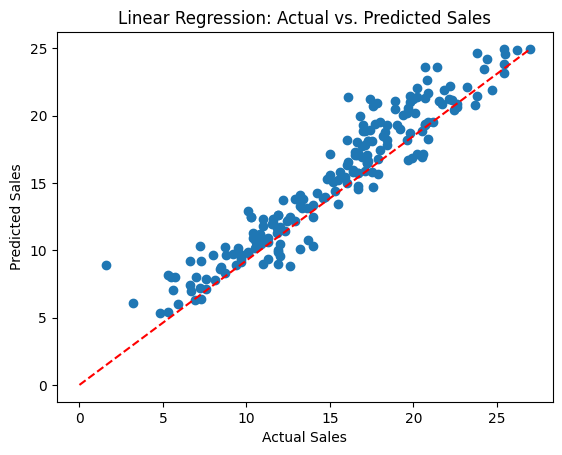

In [36]:
# Predictions
predictions = model.predict(X)

# Plot actual vs. predicted sales
plt.scatter(y, predictions)
plt.plot([0, max(y)], [0, max(predictions)], color='red', linestyle='--')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Linear Regression: Actual vs. Predicted Sales")
plt.show()

In [38]:
new_expenditures = [[200, 40, 50]]
predicted_sales = model.predict(new_expenditures)
print(f"Predicted sales for new expenditures: ${predicted_sales[0]:.2f}")


Predicted sales for new expenditures: $19.82


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


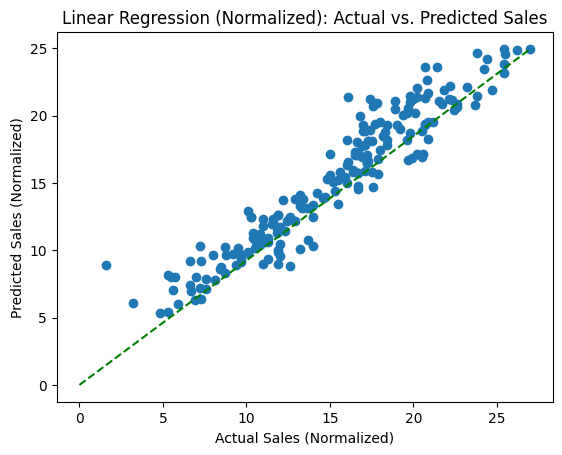

In [39]:
# Normalize features (TV, Radio, Newspaper)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Fit the model on normalized data
model_normalized = LinearRegression().fit(X_normalized, y)

# Predictions on normalized data
predictions_normalized = model_normalized.predict(X_normalized)

# Plot actual vs. predicted sales (normalized)
plt.scatter(y, predictions_normalized)
plt.plot([0, max(y)], [0, max(predictions_normalized)], color='green', linestyle='--')
plt.xlabel("Actual Sales (Normalized)")
plt.ylabel("Predicted Sales (Normalized)")
plt.title("Linear Regression (Normalized): Actual vs. Predicted Sales")
plt.show()

In [41]:
# Simplified model with only 'Radio' and 'Newspaper'
X_simplified = df[['Radio', 'Newspaper']].dropna() # Drop rows with missing values
model_simplified = LinearRegression().fit(X_simplified, y)

# Coefficients for simplified model
coefficients_simplified = model_simplified.coef_
print("Coefficients (Radio, Newspaper):", coefficients_simplified)

# Predictions for new expenditures
new_expenditures_simplified = [[40, 50]]  # Radio: $40, Newspaper: $50
predicted_sales_simplified = model_simplified.predict(new_expenditures_simplified)
print(f"Predicted sales for new expenditures (Radio + Newspaper): ${predicted_sales_simplified[0]:.2f}")

Coefficients (Radio, Newspaper): [0.11938444 0.0097279 ]
Predicted sales for new expenditures (Radio + Newspaper): $17.31


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
